In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [3]:
df_mall = pd.read_csv('Mall_Customers.csv')
df_mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:>

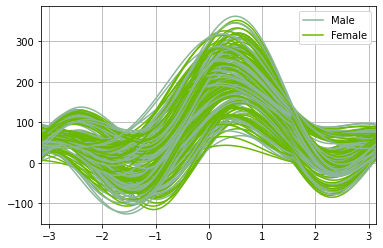

In [4]:
pd.plotting.andrews_curves(df_mall, 'Gender')

In [5]:
df_mall['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
X = df_mall.iloc[:,[3,4]].values

In [7]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=1)
    km.fit(X)
    wcss.append(km.inertia_)
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30566.45113025185,
 25005.55037243283,
 21996.523372372307,
 19746.91195766089]

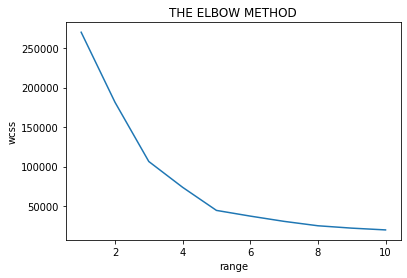

In [8]:
plt.plot(range(1,11),wcss)
plt.title('THE ELBOW METHOD')
plt.xlabel('range')
plt.ylabel('wcss')
plt.show()

In [9]:
km = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=1)
y_means = km.fit_predict(X)

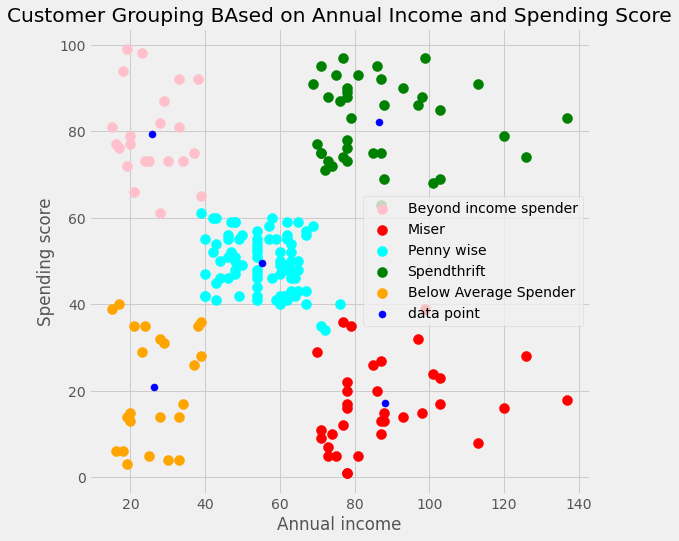

In [11]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))
plt.scatter(X[y_means ==0,0],X[y_means ==0,1],s=100,c='pink',label ='Beyond income spender')
plt.scatter(X[y_means ==1,0],X[y_means ==1,1],s=100,c='red',label = 'Miser')
plt.scatter(X[y_means ==2,0],X[y_means ==2,1],s=100,c='cyan',label='Penny wise')
plt.scatter(X[y_means ==3,0],X[y_means ==3,1],s=100,c='green',label = 'Spendthrift')
plt.scatter(X[y_means ==4,0],X[y_means ==4,1],s=100,c='orange',label = 'Below Average Spender')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='blue',label='data point')
plt.xlabel('Annual income')
plt.ylabel('Spending score')
plt.title('Customer Grouping BAsed on Annual Income and Spending Score')
plt.legend()
plt.show()